# Modules python
Importer les modules pandas (comme `pd`) numpy (commme `np`)
matplotlib.pyplot (comme  `plt`) et statsmodels.formula.api (comme `smf`). 
Importer aussi `Axes3D` de `mpl_toolkits.mplot3d`.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.formula.api as smf

# Régression multiple ozone (2 variables)

## Importation des données
Importer les données d'ozone dans le DataFrame pandas `ozone`

In [5]:
ozone = pd.read_csv("ozone.txt", header=0, sep=";")

## Représention en 3D
Nous sommes intéressé par batir un modèle de prévision de l'ozone par 
une régression multiple. Cette régression expliquera
le maximum de la concentration en ozone du jour (variable `O3`) par 
- la température à midi notée `T12`
- la vitesse du vent sur l'axe Est-Ouest notée `Vx`
Représentons graphiquement les données avec `O3` sur l'axe z, 
`T12` sur l'axe x et `Vx` sur l'axe y.

Text(0.5, 0, 'O3')

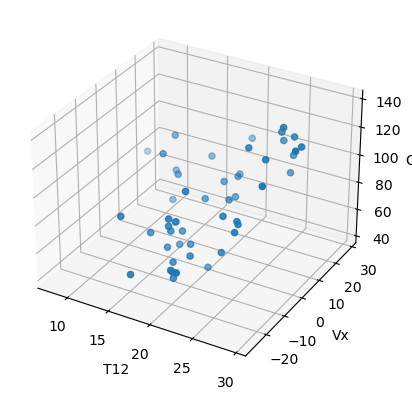

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax = Axes3D(fig)
ax.scatter(ozone["T12"], ozone["Vx"],ozone["O3"])
ax.set_xlabel('T12')
ax.set_ylabel('Vx')
ax.set_zlabel('O3')

## Modèle de prévision
Écrire le modèle évoqué ci-dessus.

\$y_i = \beta_1 + \beta_2 X_i + \beta_3 Z_i + \varepsilon_i\$
où 
- \$X_i\$ est la \$i^e\$ observation de la variable explicative `T12` et
- \$Z_i\$ est la \$i^e\$ observation de la variable explicative `Vx`
- \$X_i\$ est la \$i^e\$ observation de la variable à expliquer `O3`
- \$\varepsilon_i\$ est la \$i^e\$ coordonnée du vecteur d'erreur
  \$\varepsilon\$
Traditionnellement on introduit toujours comme c'est le cas ici la constante 
(variable associée à \$\beta_1\$).

## Estimation du modèle
Estimer par MCO les paramètres du modèle décrit ci-dessus et faites en le résumé.

In [7]:
reg = smf.ols('O3~T12+Vx', data=ozone).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.525
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     25.96
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           2.54e-08
Time:                        14:53:04   Log-Likelihood:                -210.53
No. Observations:                  50   AIC:                             427.1
Df Residuals:                      47   BIC:                             432.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.4530     10.745      3.300      0.002      13.838      57.068
T12            2.5380      0.515      4.927      0.000       1.502       3.574
Vx             0.8736      0.177      4.931      0.000       0.517       1.230
==============================================================================
Omnibus:                        0.280   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.869   Jarque-Bera (JB):                0.331
Skew:                           0.165   Prob(JB):                        0.848
Kurtosis:                       2.777   Cond. No.                         94.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Régression multiple ozone (modèle du cours)

## Importation des données
Importer les données d'ozone dans le DataFrame pandas `ozone`

In [9]:
ozone = pd.read_csv("ozone.txt", header=0, sep=";")

## Estimation du modèle du cours
Nous sommes intéressé par batir un modèle de prévision de l'ozone par 
une régression multiple. Ce régression expliquera
le maximum de la concentration en ozone du jour (variable `O3`) par 
- la température à midi notée `T12`
- la nébulosité à midi notée `Ne12`
- la vitesse du vent sur l'axe Est-Ouest notée `Vx`
Traditionnellement on introduit toujours la constante (le faire ici aussi).
Estimer le modèle par MCO et faire le résumé.

In [10]:
reg = smf.ols('O3~T12+Ne12+Vx', data=ozone).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     O3   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     32.87
Date:                Mon, 07 Apr 2025   Prob (F-statistic):           1.66e-11
Time:                        15:05:13   Log-Likelihood:                -200.50
No. Observations:                  50   AIC:                             409.0
Df Residuals:                      46   BIC:                             416.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     84.5473     13.607      6.214      0.000      57.158     111.936
T12            1.3150      0.497      2.644      0.011       0.314       2.316
Ne12          -4.8934      1.027     -4.765      0.000      -6.961      -2.826
Vx             0.4864      0.168      2.903      0.006       0.149       0.824
==============================================================================
Omnibus:                        0.211   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.900   Jarque-Bera (JB):                0.411
Skew:                          -0.050   Prob(JB):                        0.814
Kurtosis:                       2.567   Cond. No.                         148.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variabilité 
- Trouver parmi les estimateurs des coefficients des effets des variables
(hors constante) celui qui est le plus variable.
- La variabilité est indiquée par
  - la variance du paramètre
  - l'écart-type du paramètre
  - la variance estimée du paramètre
  - l'écart-type estimé du paramètre
- Afficher l'estimation de \$\sigma^2\$

Par lecture du résumé la colonne `std err` donne les
écart-types estimés des coordonnées de \$\hat \beta\$ et le plus grand 
est celui associé à la variable `Ne12`.

In [11]:
reg.scale

193.57873901889414

# Régression multiple eucalytus

## Importation des données
Importer les données d'eucalytus dans le DataFrame pandas `eucalypt`

In [13]:
eucalypt = pd.read_csv("eucalyptus.txt", header=0, sep=";")

## représentation des données
Représenter le nuage de points

Text(0, 0.5, 'ht')

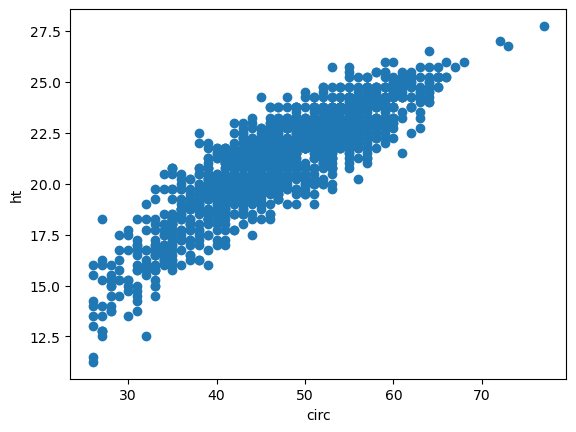

In [14]:
plt.plot(eucalypt["circ"],eucalypt["ht"],'o')
plt.xlabel("circ")
plt.ylabel("ht")

## Modèle de prévision
Estimer (par MCO) le modèle linéaire expliquant la hauteur (`ht`) 
par la variable circonférence (`circ`) et la racine carrée de la
circonférence.  On pourra utiliser les
opérations et fonctions dans les formules
(voir https://www.statsmodels.org/stable/example_formulas.html)

In [15]:
regmult = smf.ols("ht ~ circ +  np.sqrt(circ)", data = eucalypt).fit()
regmult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     ht   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     2718.
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:06:28   Log-Likelihood:                -2208.5
No. Observations:                1429   AIC:                             4423.
Df Residuals:                    1426   BIC:                             4439.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       -24.3520      2.614     -9.314      0.000     -29.481     -19.223
circ             -0.4829      0.058     -8.336      0.000      -0.597      -0.369
np.sqrt(circ)     9.9869      0.780     12.798      0.000       8.456      11.518
==============================================================================
Omnibus:                        3.015   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.221   Jarque-Bera (JB):                2.897
Skew:                          -0.097   Prob(JB):                        0.235
Kurtosis:                       3.103   Cond. No.                     4.41e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Répresentation graphique du modèle
Réprésenter sur un graphique les données, la prévision par le modèle ci-dessus et
la prévision par les modèles de régression simple vus dans l'exercice « deux modèles »
dans le TP de régression simple.

In [16]:
reg = smf.ols('ht~circ', data=eucalypt).fit()
regsqrt = smf.ols('ht~I(np.sqrt(circ))', data=eucalypt).fit()

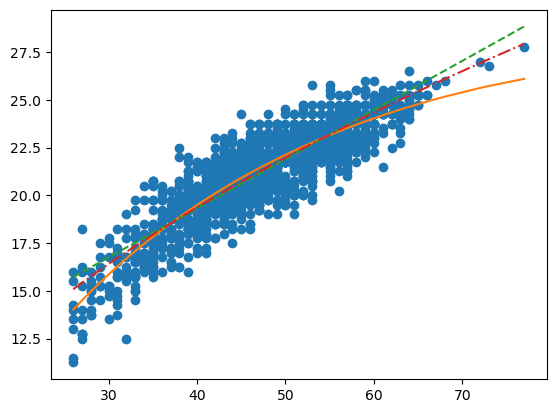

In [17]:
sel = eucalypt['circ'].argsort()
xs = eucalypt.circ.iloc[sel]
ys1 = regmult.predict()[sel]
ys2 = reg.predict()[sel]
ys3 = regsqrt.predict()[sel]
plt.plot(eucalypt['circ'], eucalypt['ht'], "o", xs, ys1, "-", xs, ys2, "--", xs, ys3, "-.")